In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from merge_years.import_data import get_full_data

In [222]:
full_data = get_full_data('../raw_data')

In [282]:
full_data.columns

Index(['name', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW', 'season', 'position',
       'dreamteam_yearly_average', 'team_id', 'team_name', 'opponent_level',
       'team_level', 'kickoff_date'],
      dtype='object')

### Splitting data into positions ***

In [458]:
mid_data = full_data[full_data.position == "MID"]
def_data = full_data[full_data.position == "DEF"]
fwd_data = full_data[full_data.position == "FWD"]
gk_data = full_data[full_data.position == "GK"]

**** SELECTING FEATURES ****

features were selected with common sense and little data exploration

In [425]:
known_features = ['name', 'opponent_team','kickoff_time','was_home',
                 'opponent_level','team_level','dreamteam_yearly_average','GW',
                  'team_id','season','kickoff_date','position']

game_features = ['name','assists', 'bonus', 'bps', 'clean_sheets', 
                 'creativity','goals_conceded','threat',
                 'goals_scored', 'ict_index','influence',
                 'kickoff_time', 'minutes','own_goals',
                 'penalties_missed', 'penalties_saved',
                 'red_cards', 'saves','transfers_balance',
                 'value','yellow_cards','team_a_score',
                 'team_h_score','total_points']

know_feat_df = full_data[known_features]
game_features = full_data[game_features]

In [466]:
def roll_match_features(df_match, df_pre_match, roll=3, method='mean'):
    '''
    Returns the lagged dataframe with a chosen method and lagging window
    Adds a 'real_total_points' column
    '''
    # roll
    rolled_df = df_match.groupby('name')
    if method == 'mean':
        rolled_df = rolled_df.rolling(roll,closed='left').mean()
    elif method == 'max':
        rolled_df = rolled_df.rolling(roll,closed='left').max()
    elif method == 'min':
        rolled_df = rolled_df.rolling(roll,closed='left').min()
    else: #do a mean() meathod
        rolled_df = rolled_df.rolling(roll,closed='left').mean()

    rolled_df.reset_index(inplace=True)
    
    # Add back the un-lagged, real total_points
    rolled_df['real_total_points'] = df_match['total_points']
    
    # Rename the moving average total_points
    rolled_df.rename({'total_points':'points_pred'},axis=1, inplace=True)
    
    # Join the features available pre-match
    data = rolled_df.join(df_pre_match[['opponent_team','kickoff_time','was_home',
                 'opponent_level','team_level','dreamteam_yearly_average','GW',
                  'team_id','season','kickoff_date','position']])
    
    # Delete the NaN values
    data = data[~rolled_game_features.total_points.isnull()]
    
    return data

In [467]:
data = roll_match_features(game_features, know_feat_df)

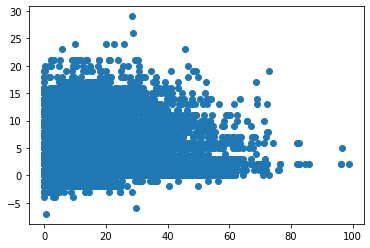

In [468]:
plt.scatter(data['creativity'], data['real_total_points'])

### USELESS

In [235]:
from sklearn.model_selection import train_test_split

In [273]:
gk_y = gk_data.total_points
gk_X = gk_data.drop("total_points", axis=1)
# Drop the name
gk_X.drop("name", axis = 1, inplace = True)

/Users/henrybichot/.pyenv/versions/3.9.1/envs/fflpred/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [274]:
gk_X_train, gk_X_test, gk_y_train, gk_y_test = train_test_split(
    gk_X, gk_y, test_size=0.3, random_state=42)

*** Bool to int ***

In [275]:
gk_X_train.was_home = gk_X_train.was_home.map(int)

/Users/henrybichot/.pyenv/versions/3.9.1/envs/fflpred/lib/python3.9/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


*** X_test prep ***

- the known feature should be used
- match features should be moving averages from previous games

In [ ]:
known features = ["opponent_team", ]

In [276]:
gk_X_test.columns

Index(['saves', 'bonus', 'bps', 'influence', 'penalties_saved',
       'goals_conceded', 'own_goals', 'opponent_team', 'transfers_balance',
       'was_home', 'saves', 'value'],
      dtype='object')